# **Семинар 11. Визуализация. `Seaborn`**

#### <i>Малкова Ксения, Преподаватель ФКН НИУ ВШЭ, kemalkova@hse.ru</i>

`seaborn` - еще одна библиотека для визуализации данных в python, основанная на `matplotlib`. В чем ее удобство?
- **Интегрирован с Pandas** - seaborn позволяет работать напрямую с датафреймами
- **Специализированные, но иформативные графики** - в seaborn есть некоторые типы графиков, например violin plots, pair plots и heatmaps, которые достаточно часто нужны при визуализации, но их сложнее создать с помощью Matplotlib.
- **Более простая визуализация** - в отличие от Matplotlib, где зачастую требуются дополнительные строки кода для улучшения внешнего вида графика, в Seaborn многие настройки по умолчанию уже оптимизированы
- **Все еще кастомизирована** - так как она основана на `matplotlib`, то можно надстраивать графики точно также, как и в базовой библиотеке. Иногда это относят к недостаткам, так как знаний только seaborn будет недостаточно для "полного контроля" над графиками. Но как будто велосипед с нуля не всегда обязательно строить

Из минусов библиотеки можно назвать трудности с отрисовкой очень больших объемов данных. matplotlib чаще справляется гораздо быстрее

In [1]:
# !pip install seaborn -q

In [2]:
# импортируем обе библиотеки, так как matplotlib все еще может понадобиться для кастомизации
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

## 1. Настройки по-умолчанию

### Стили графиков
Seaborn предоставляет несколько базовых стилей для оформления графиков, которые можно установить с помощью `sns.set_style()`
- `whitegrid` (по умолчанию) - светлый фон с сеткой.
- `darkgrid` - темный фон с сеткой.
- `white` - светлый фон без сетки.
- `dark` - темный фон без сетки.
- `ticks` - акцент на отметках осей.

### Настройки графиков
Можно детализировать настройку графиков "по умолчанию". Например, сделать так, чтобы все линии были размера не 1, а 2 (linewidth) и т.п. Это можно сделать через настройку аргументов в `sns.set_style()`
- `grid.linewidth` - толщина линий сетки.
- `grid.color` - цвет линий сетки.
- `axes.edgecolor` - цвет рамки осей.
- `axes.linewidth` - толщина линии рамки.

Также можно настроить размер и разрешение графиков по умолчанию - через `sns.set()`. Например:

```python
    sns.set(rc = {"figure.figsize": (12,8), "figure.dpi" : 300})
```

### Цветовые палитры

С помощью `sns.set_palette()` можно задать набор цветов для графиков:
- *Гармоничные*: `deep`, `muted`, `pastel`, `dark`, `colorblind`.
- *Циклические*: `Set2`, `Paired`, `husl`, `cubehelix`.

Посмотреть на различные настройки можно будет только когда построим первый график :)

Поставим так, но с этим моэно поиграться

In [3]:
sns.set_style('darkgrid')
sns.set_palette('dark')
sns.set(rc = {"figure.figsize": (8, 6), "figure.dpi" : 120})

## 2. **Базовые графики**

Воспользуемся seaborn на полную и возьмем датасет, который он любезно предоставляет!

In [4]:
# все доступные датасеты
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Загрузка датасета:
```python
sns.load_dataset('название датасета')
```

In [5]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Видим несколько пропусков. Просто выкинем их

In [7]:
penguins.dropna(inplace=True)
penguins.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### 1. `sns.histplot()` (гистограмма)

**Синтаксис**

Способ-1:

```python
    sns.histplot(x='Признак', data=table_name, ...)
```

Способ-2:
```python
    sns.histplot(x=table_name['Признак'], ...)
```

<Axes: xlabel='bill_length_mm', ylabel='Count'>

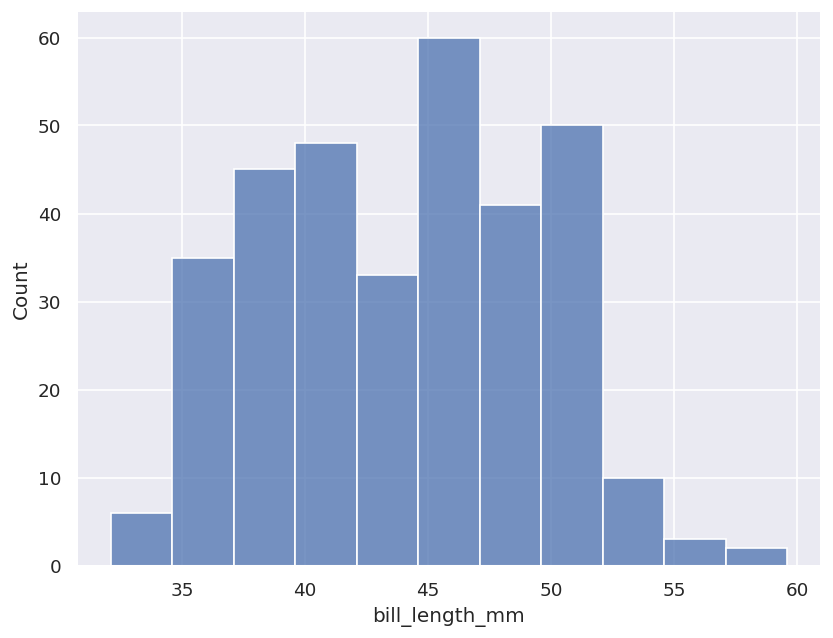

In [8]:
sns.histplot(x='bill_length_mm', data=penguins)

**Параметры**
- **`bins`** - число интервалов (как в matplotlib)
- **`alpha`** - прозрачность (как в matplotlib), от 0 до 1
- **`color`** - цвет. Если указываем `color` и рисуем на одном графике несколько распределений, то все будут окрашены в один цвет, что бессмысленно
- **`palette`** - палитра цветов (или из seaborn, или список цветов: количество цветов должно совпадать с цислом гистограмм)
- **`hue`** - позволяет делать группировку по категориям. В случае histplot построит $n$ гистограмм, где $n$ - число категорий. Каждую покрасит в свой цвет, назовет по наименованию категории и добавит в легенду.
- **`hue_order`** - порядок категорий для `hue`
- **`kde`** - при True добавляет кривую плотности
- **`stat`** - формат гистограммы: **count** (по умолчанию - количество строк), **probability** (доля от общего числа наблюдений), **density** (гистограмма нормализуется так, что площаль под гистограммой = 1), **percent**.

Настроим данные параметры. Более того, давайте надстроим график, как и в matplotlib - изменим размер графика, добавим название

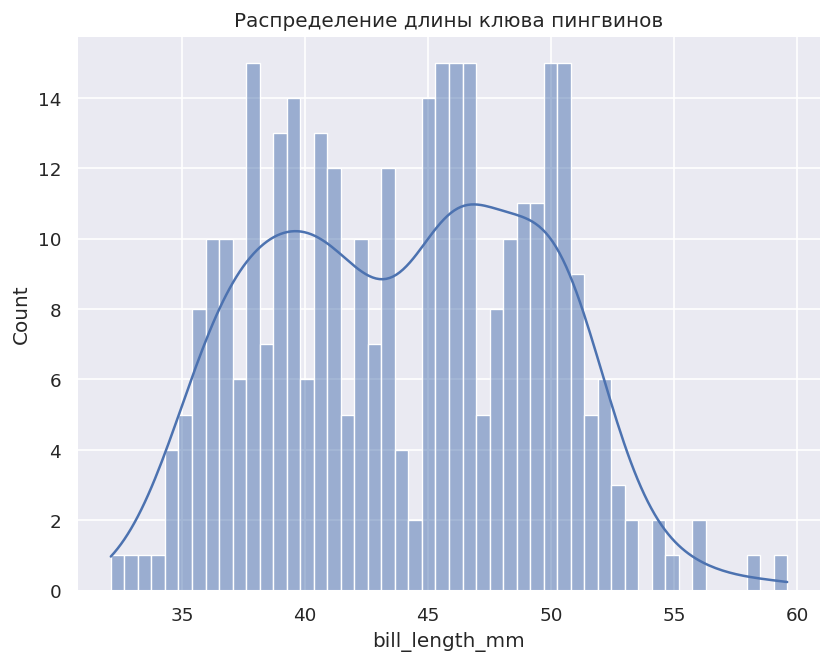

In [9]:
sns.histplot(x='bill_length_mm', data=penguins, 
            bins=50,        # увеличим число интервалов
            kde=True,       # добавим плотность
            )

plt.title('Распределение длины клюва пингвинов')
plt.show()

Теперь стало явно видно бимодальное распределение

Попробуем применить параметр `hue` по параметру пола. seaborn должен самостоятельно сгруппировать данные и построить две гистограммы по полу

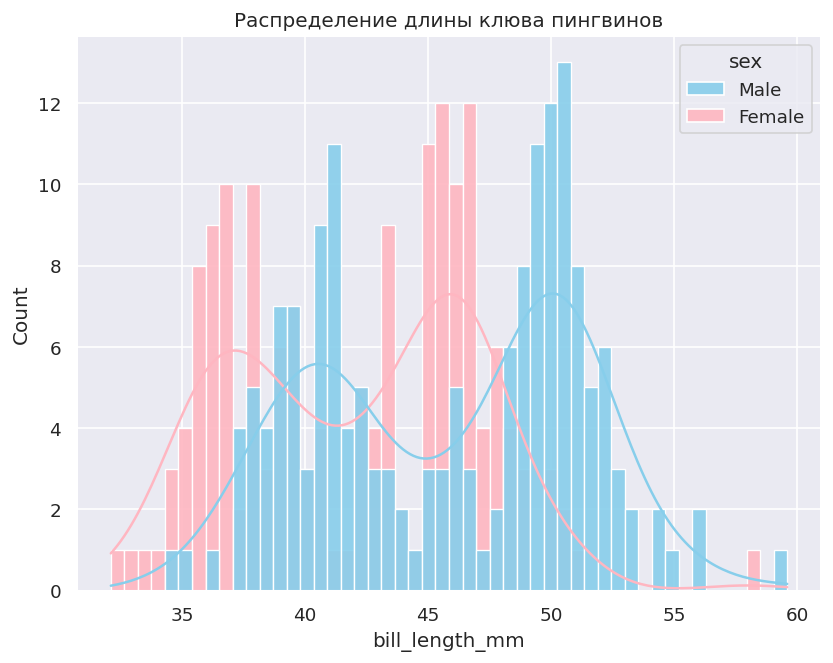

In [10]:
sns.histplot(x='bill_length_mm', data=penguins, 
            bins=50,
            kde=True,
            hue='sex',
            palette=['skyblue', 'lightpink'], 
            alpha=0.9
            )

plt.title('Распределение длины клюва пингвинов')
plt.show()

---

### 2. `sns.boxplot` (ящик-с-усами)
**Синтаксис**
```python
    sns.boxplot(y='Признак', data=table_name, ...)
```

**Параметры**
- **`hue`**, **`hue_order`**, **`alpha`**, **`color`**
- **`width`** - ширина ящика (по умолчанию 0.8)
- **`linewidth`** - толщина линий ящика; `linecolor` - цвет линий
- **`fill`** - False если хотим нарисовать только "обводку" графика. True, если хотим раскрасить ящик 
- **`fliersize`** - размер точек-выбросов
- **`gap`** - размер отступа между боксплотами. Необходим, если на одном графике рисуем несколько боксплотов (н-р передаем параметр `hue`)

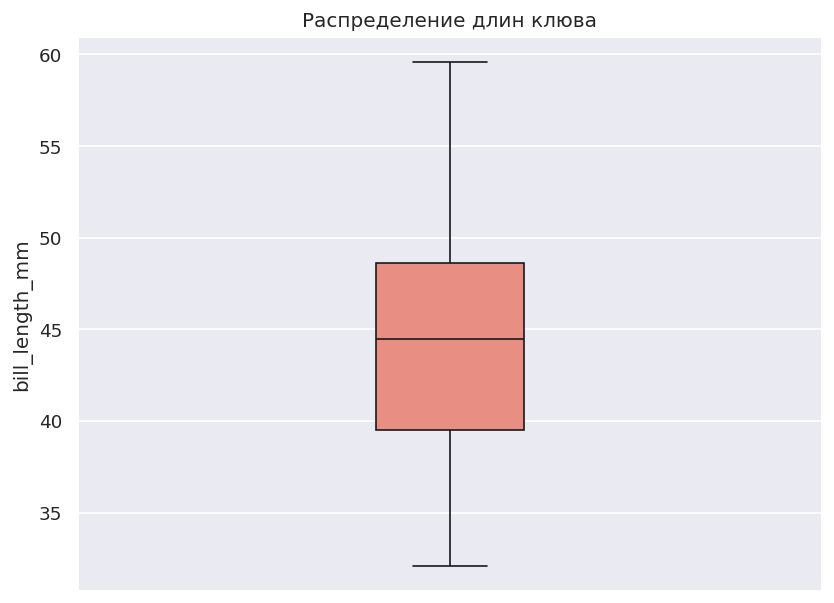

In [11]:
sns.boxplot(y = 'bill_length_mm', data = penguins, 
            width=0.2, 
            color='salmon', 
            linecolor='k'
            )
plt.title('Распределение длин клюва');

Укажем параметр `hue`. 
- Тогда нужно убрать цвет (`color`)
- Можно задать несколько цветов через `palette`. Можно либо выбрать палетку из seaborn, либо передать список цветов
- Лучше задать параметр `gap`, чтобы боксплоты не слипались

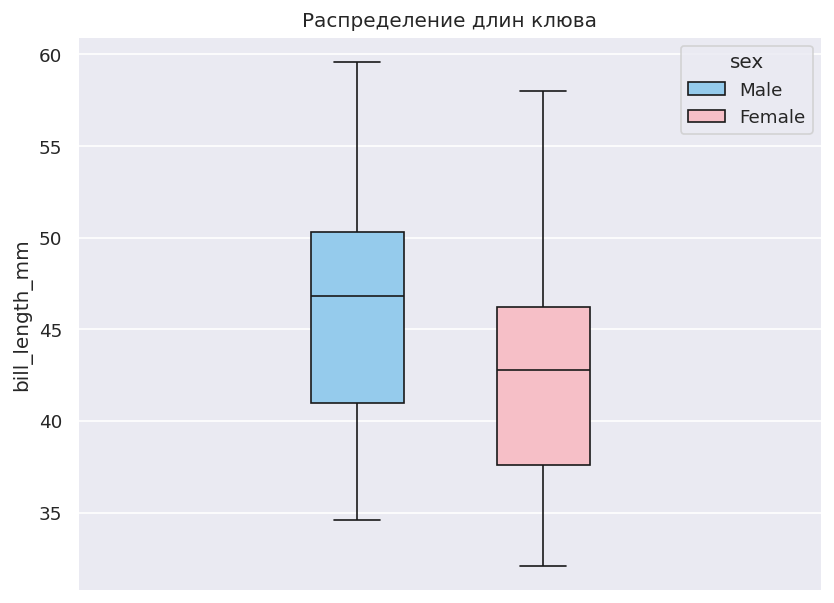

In [12]:
sns.boxplot(y = 'bill_length_mm', data = penguins, 
            width=0.5, 
            linecolor='k',
            hue='sex', 
            gap=0.5,
            palette=['lightskyblue', 'lightpink']
            )
plt.title('Распределение длин клюва');

### 3. **`sns.violinplot`**  

Violinplot сочетает ящик с усами и KDE для визуализации распределения.

**Синтаксис**
```python
sns.violinplot(x="category", y="value", data=table_name, ...)
```

**Параметры**  
- **`hue`**, **`alpha`**, **`color`**
- **`scale`** - управление масштабированием высоты:  
  - `"area"` (по умолчанию) - одинаковая площадь всех графиков  
  - `"count"` - масштабируется по числу наблюдений
  - `"width"` - одинаковая ширина для всех
- **`inner`** - определяет, что отображать внутри графика:  
  - `"box"` (по умолчанию) - ящик с усами.  
  - `"quartile"` - линии квартилей
  - `"point"` - точки данных
  - `None` - ничего
- **`linewidth`** - толщина линий графика.  
- **`fliersize`** - размер точек-выбросов (если внутри боксплот)
- **`width`** - ширина каждого графика (по умолчанию 0.8).  
- **`gap`** - отступ между графиками (при использовании `hue`)

Проще говоря, violinplot сочетает в себбе гистограмму и боксплот. Давайте посмотрим на то же самое распрееделение длины клюва:

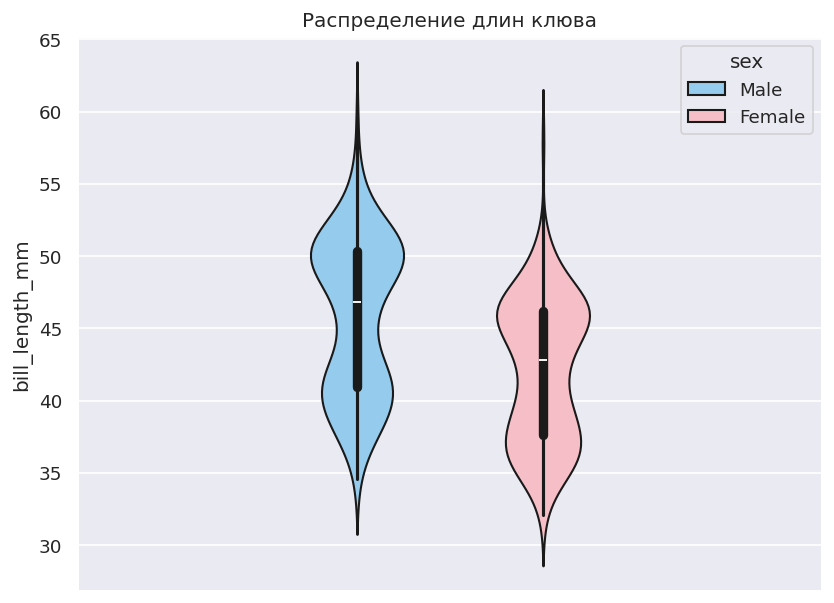

In [13]:
sns.violinplot(y = 'bill_length_mm', data = penguins, 
               width=0.5,
               linecolor='k',
               hue='sex', 
               gap=0.5,
               palette=['lightskyblue', 'lightpink']
               )

plt.title('Распределение длин клюва');

---

### 4. **`sns.barplot`** (столбчатая диаграмма)  
В отличие от классических столбчатых диаграмм, как в Matplotlib, в Seaborn можно отобразить не просто высоту для одной категории, но и **агрегированные значения на основе данных**. По умолчанию для каждой категории берётся среднее значение, но можно выбрать другую статистику с помощью параметра `estimator`.  

Также Seaborn автоматически добавляет **доверительные интервалы** для каждой группы, показывая диапазон возможных колебаний статистики.

**Синтаксис**  
```python
sns.barplot(x="category", y="value", data=table_name, ...)
```

**Параметры**  
- **`hue`**, **`palette`**, **`width`**, **`alpha`**, **`color`**
- **`errorbar`** - какое отклонение показывать:  
  - `"ci"` - доверительный интервал (confidence interval). Диапазон, где с определенной вероятностью (обычно 95%) может находиться истинное среднее значение.
  - `"sd"` - стандартное отклонение (standard deviation). Показывает, насколько данные в выборке распределены вокруг среднего значения.
  - `"se"` - стандартная ошибка среднего (standard error). Показывает оценку вероятного диапазона отклонений выборочного среднего от истинного среднего.
  - `"pi"` - prediction interval. Показывает диапазон, куда с заданной вероятностью попадёт новое наблюдение.
  - `None` - ничего не рисовать
- **`estimator`** - агрегирующая функция (по умолчанию `"mean"`). Можно использовать, например, `"median"` или пользовательскую функцию.  
- **`capsize`** - ширина горизонтальной линии на концах доверительных интервалов (по умолчанию 0).  
- **`errcolor`** - цвет доверительных интервалов.  
- **`errwidth`** - толщина линии доверительного интервала.  

Давайте нарисуем распределение **массы** (`body_mass_g`) в зависимости от **вида** пингвина (`species`). 
- В качестве `estimator` будет выступать среднее
- В качестве `errorbar` укажем стандартное отклонение

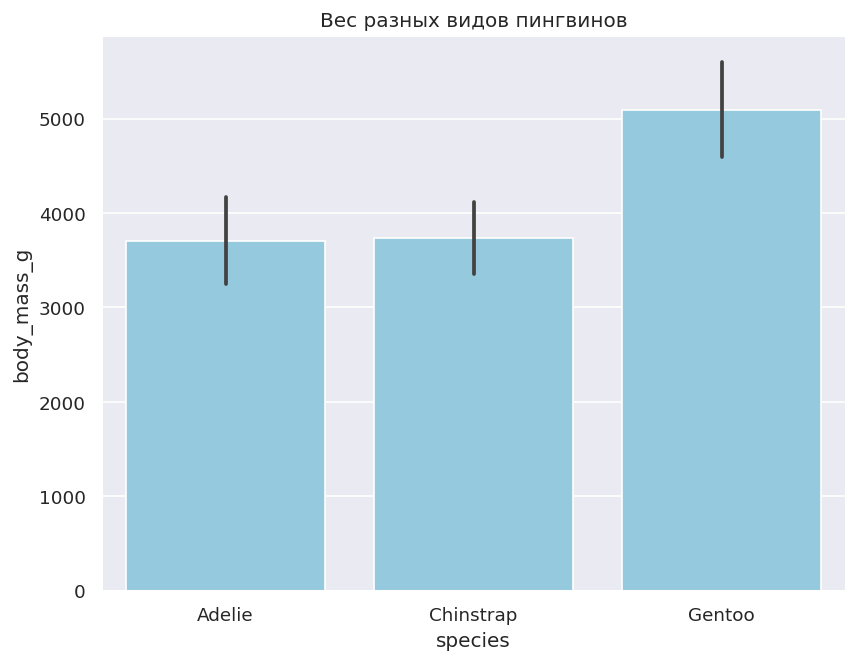

In [14]:
sns.barplot(x='species', y='body_mass_g', data=penguins,
            estimator='mean', 
            errorbar='sd', 
            color='skyblue'
            )

plt.title('Вес разных видов пингвинов')
plt.show()

Теперь укажем параметр `hue` - отобразим вес отдельно для мужских и женских особей внутри каждого вида. И не забываем про цветовую палитру! 

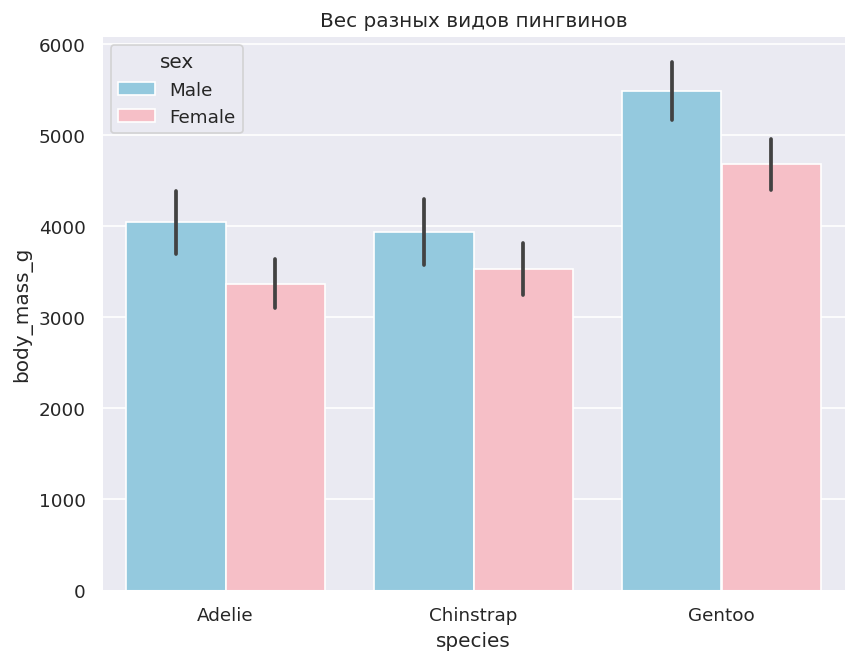

In [15]:
sns.barplot(x='species', y='body_mass_g', data=penguins, 
            hue='sex', 
            palette=['skyblue', 'lightpink'],
            estimator='mean', 
            errorbar='sd',
            )

plt.title('Вес разных видов пингвинов')
plt.show()

---

### 5. **`sns.scatterplot`**

**Синтаксис**
```python
sns.scatterplot(x="x_value", y="y_value", data=table_name, ...)
```

**Параметры:**
- **`hue`**, **`hue_order`**, **`alpha`**, **`palette`**, **`color`**
- **`s`** - размер точек (для всех точек один размер)
- **`size`** - размер точек (вектор). Можно передать другой признак - тем самым сделав зависимым от другой переменной (категориальной или числовой). Если делаем зависимым от категорий, то порядок последних можно передать в **`size_order`**
- **`sizes`**  - диапазон размеров точек (например, `(10, 200)`)
- **`style`** - определяет стиль точек на основе категориальной переменной (т.е. передаем названием столбца, по которому хотим сделать разделение по стилям). seaborn автоматически назначит разный стиль точкам из разных категорий
- **`markers`** - явно указываем стиль для каждой категории из **`style`** (например, `{"A": "o", "B": "s"}`)
- **`linewidth`** - толщина линий вокруг точек
- **`edgecolor`** - цвет границы точек 

Сначала нарисуем базовый график рассеяния - зависимость длины крыльев (`flipper_length_mm`) от длины клюва (`bill_length_mm`)

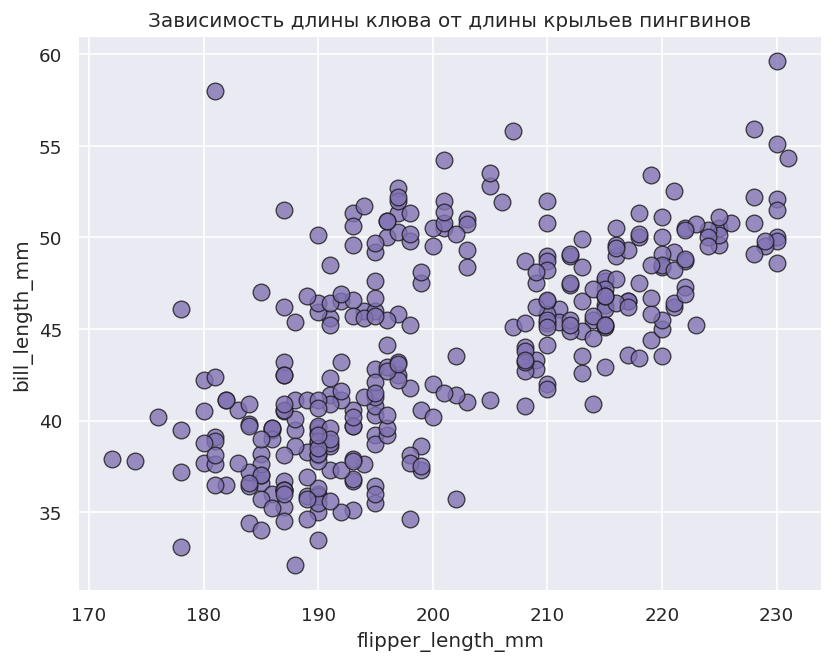

In [16]:
sns.scatterplot(x='flipper_length_mm', y='bill_length_mm', data=penguins,
                edgecolor='k', 
                color='m', 
                s=100, 
                alpha = 0.8
                )
plt.title('Зависимость длины клюва от длины крыльев пингвинов');

**Повышаем градус**
- Отобразим разные виды (`species`) разными маркерами - передав этот признак параметру **`style`**. 
- Чтобы каждый маркер был разного цвета, в параметре **`hue`** нужно указать то же самое значение, что и в **`style`**. 

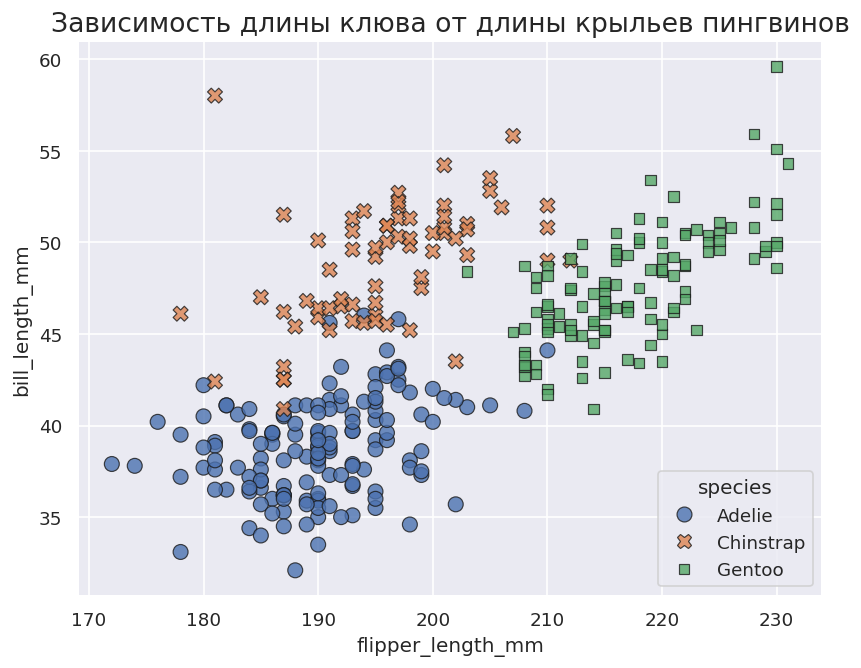

In [17]:
sns.scatterplot(x='flipper_length_mm', 
                y='bill_length_mm', 
                data=penguins,
                style='species', 
                hue='species',
                s=80, 
                edgecolor='k', 
                alpha = 0.8
                )

plt.title('Зависимость длины клюва от длины крыльев пингвинов', fontsize=16);

**Немножко поменяем стратегию**
- Раскраска по цветам - в зависимости от пола (`sex`)
- Маркеры в зависимости от вида (`species`)

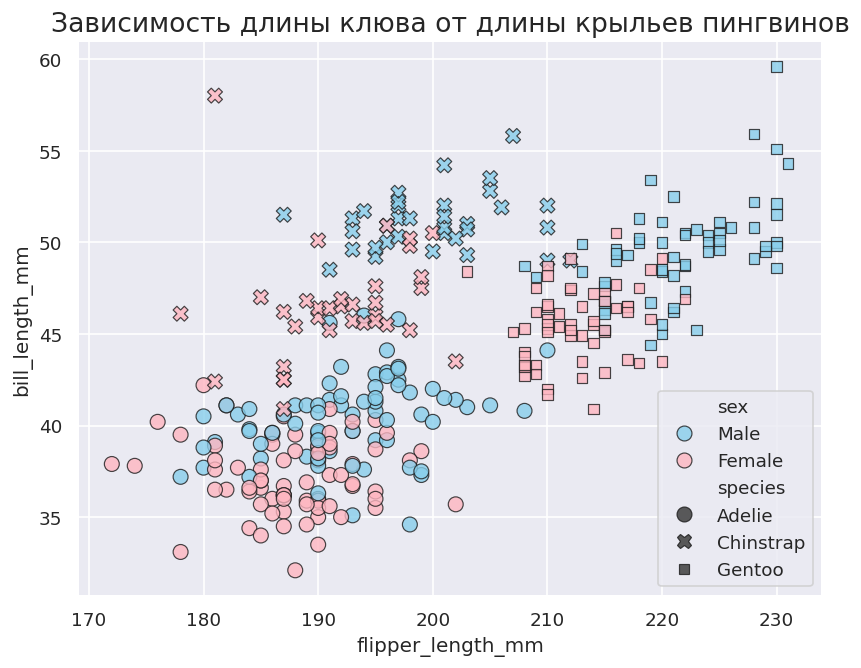

In [18]:
sns.scatterplot(x='flipper_length_mm', 
                y='bill_length_mm', 
                data=penguins,
                style='species', 
                hue='sex', hue_order=['Male', 'Female'],
                palette=['skyblue', 'lightpink'],
                s=80, 
                edgecolor='k', 
                alpha = 0.8
                )

plt.title('Зависимость длины клюва от длины крыльев пингвинов', fontsize=16);

---

### 6. **`sns.lineplot`**  
Линейные графики обычно используются для отображения **изменений во времени** или для построения **линии регрессии**

**Синтаксис**  
```python
sns.lineplot(x="time", y="value", data=table_name, ...)
```

**Параметры:**
- **`hue`**, **`hue_order`**, **`alpha`**, **`color`**
- **`style`** - стиль линий
    - 'solid' (по умолчанию)
    - 'dashed'
    - 'dotted'
    - 'dashdot'
- **`size`** - аналогично `scatterplot`, определяет толщину линии в зависимости от значения переменной
- **`ci`** - параметр для отображения доверительного интервала или стандартного отклонения
  - `ci=None` - ничего не рисовать, просто линия
  - `ci="sd"` - отобразить стандартное отклонение
  - `ci="95"` - 95% доверительный интервал (по умолчанию)
- **`estimator`** - функция, применяемая для вычисления итогового значения на каждом шаге (`mean` по умолчанию)
- **`linewidth`** - толщина линии графика.

Мы все же будем рисовать график зависимости от **времени**. Для этого скачаем датасет с данными магнитно-резонансной томографии (fmri). 
- `subject` - id исследуемого
- `timepoint` - временная точка
- `event` - stim или cue
- `region` - сигнал был измерен в теменной (parietal) или фронтальной (frontal) коре
- `signal` - значение сигнала

In [19]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [20]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


Нарисуем динамику сигнала с МРТ (`signal`) от времени (`timepoint`). Здесь усреднение будет производиться на уровне каждой временной точки среди пациентов. 

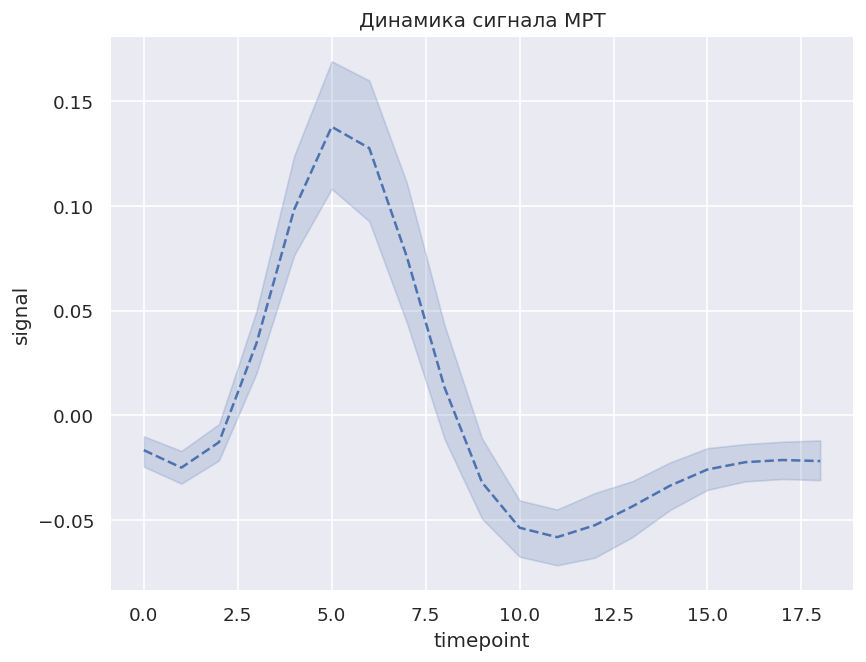

In [21]:
sns.lineplot(x='timepoint', 
             y='signal', 
             data=fmri,
             linestyle='dashed'
             )

plt.title('Динамика сигнала МРТ');

**Повышаем градус**
- Раскраска по цветам - в зависимости от региона коры (`region`)
- Маркеры в зависимости от события (`event`)

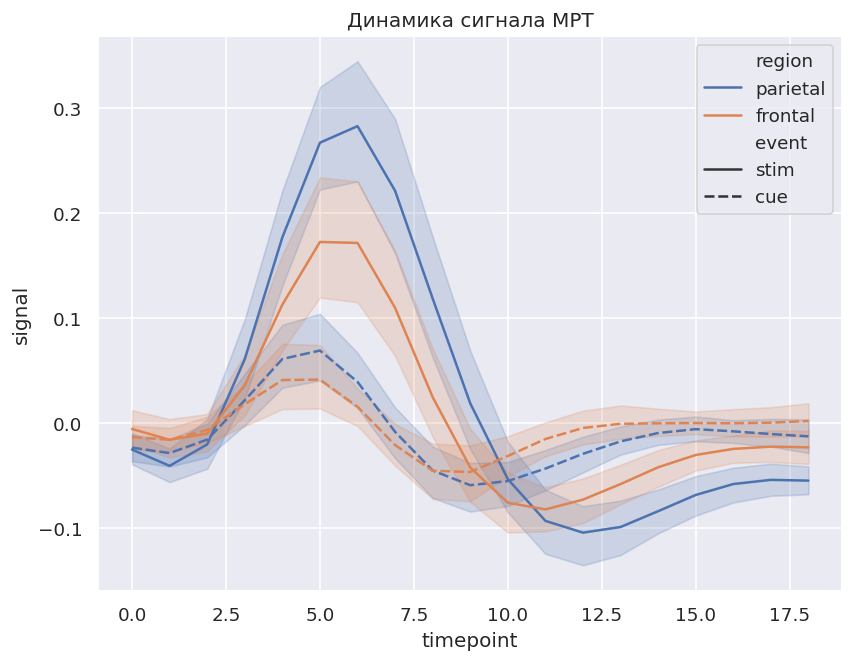

In [22]:
sns.lineplot(x='timepoint', 
             y='signal', 
             data=fmri,
             style='event', 
             hue='region',
             )

plt.title('Динамика сигнала МРТ');

---

## 3. **Продвинутые графики**

### 1. [**`sns.heatmap`**](https://seaborn.pydata.org/generated/seaborn.heatmap.html) (тепловая карта)  
Для визуализации матриц (например, корреляционных матриц).  

**Синтаксис**
```python
sns.heatmap(data=matrix, ...)
```

**Параметры**
- **`annot`** - показывает значения матрицы  
- **`fmt`** - отформатирования значения из `annot`. Например, для округления до двух знаков: `fmt='.2f'`
- **`cmap`** - задать цветовую шкалу (соответствие цветов значения матрицы). Можно указывать что-то из sns.palette
- **`linewidths`** - ширина линий между ячейками матрицы
- **`linecolor`** - цвет линий тепловой карты
- **`vmin` / `vmax`** - минимальное и максимальное значение шкалы

<Axes: >

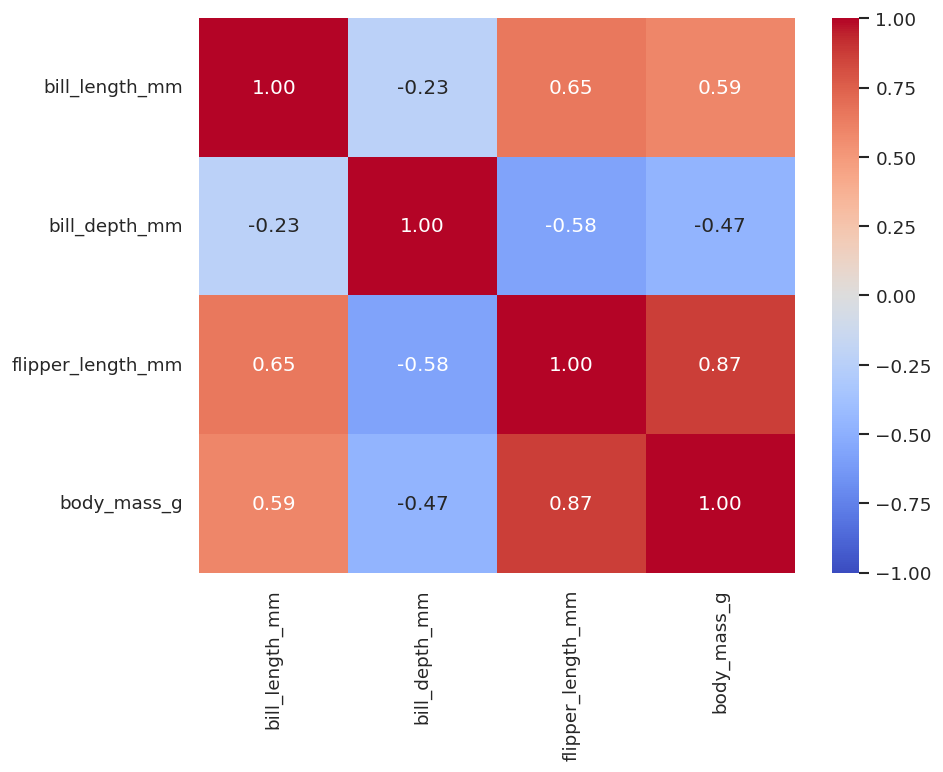

In [23]:
penguins_cormat = penguins.corr(numeric_only=True)

sns.heatmap(data=penguins_cormat, 
            annot=True, 
            fmt='.2f', 
            linecolor='black',
            vmin=-1, vmax=1,
            cmap='coolwarm')

---

### 2. [**`sns.pairplot`**](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
pairplot позволяет визуализировать все парные комбинации числовых переменных.  

**Синтаксис:**
```python
sns.pairplot(data=table_name, ...)
```

- **`hue`** - группировка по какой-то категории. `hue_order` все также задает порядок категорий
- **`diag_kind`** - тип графика на диагонали (`kde`, `hist`)
- **`kind`** - тип графиков вне диагонали (`scatter`, `reg`)
- **`markers`** - один маркер, которым отображаем scatterplot, или список из маркеров, если указываем `hue`
- **`corner`** - если True, то удалит повторяющиеся графики (triangular)
- **`palette`**, **`corner`** etc

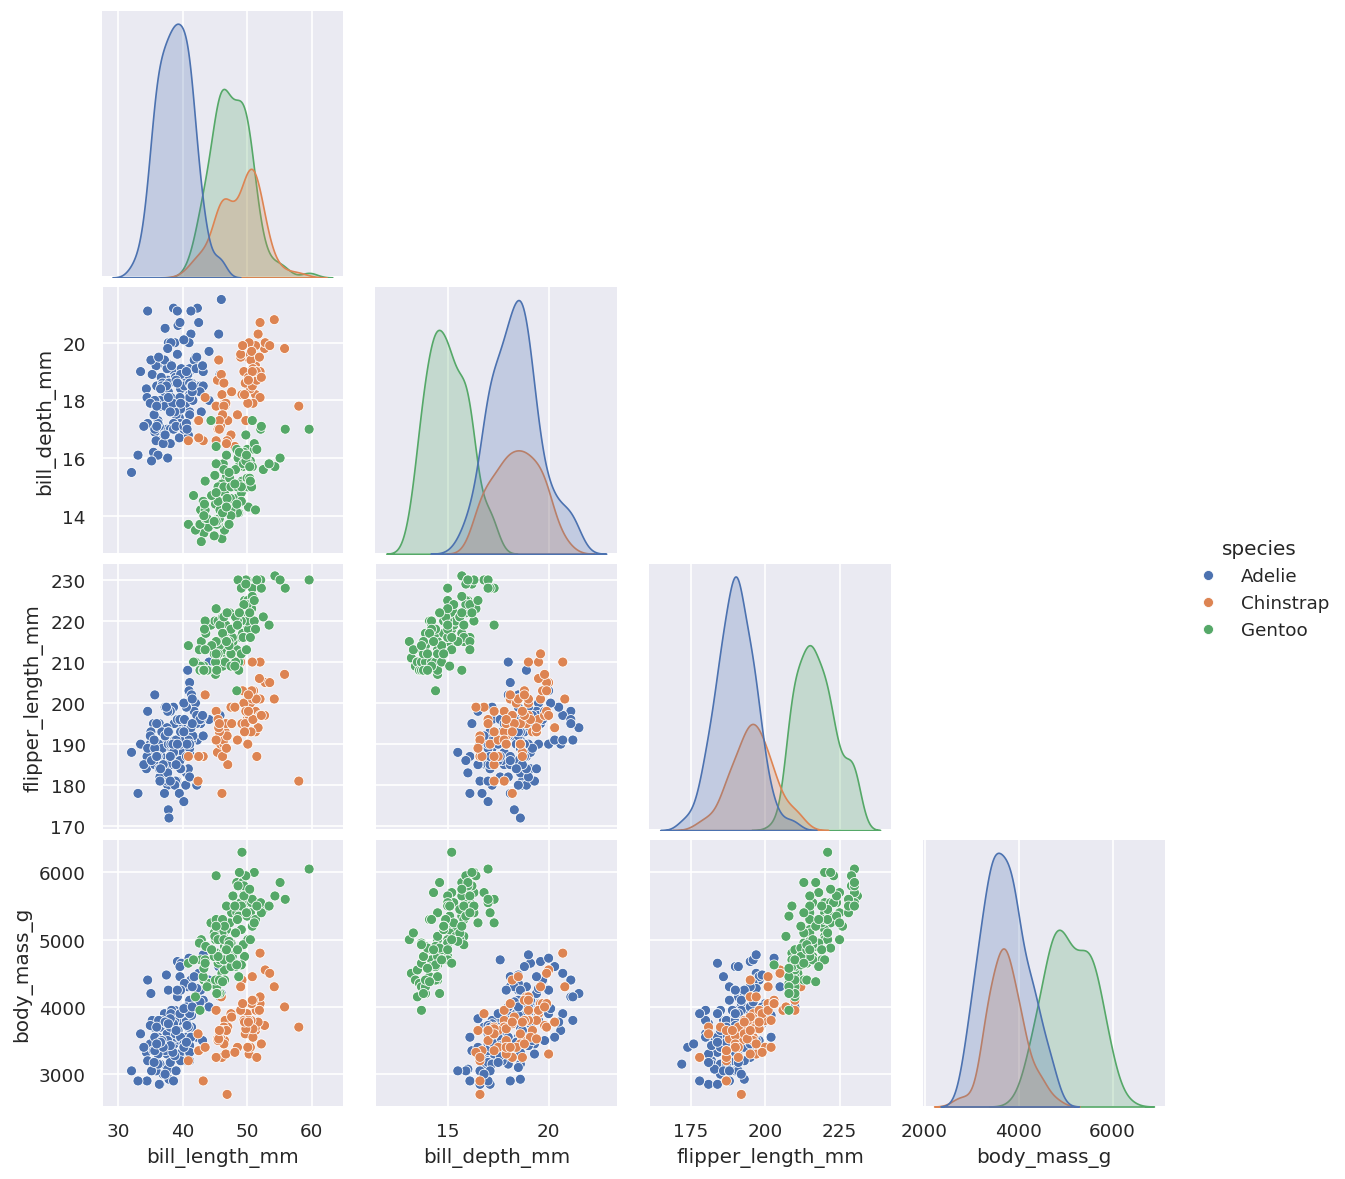

In [24]:
sns.pairplot(penguins, hue='species', corner=True)

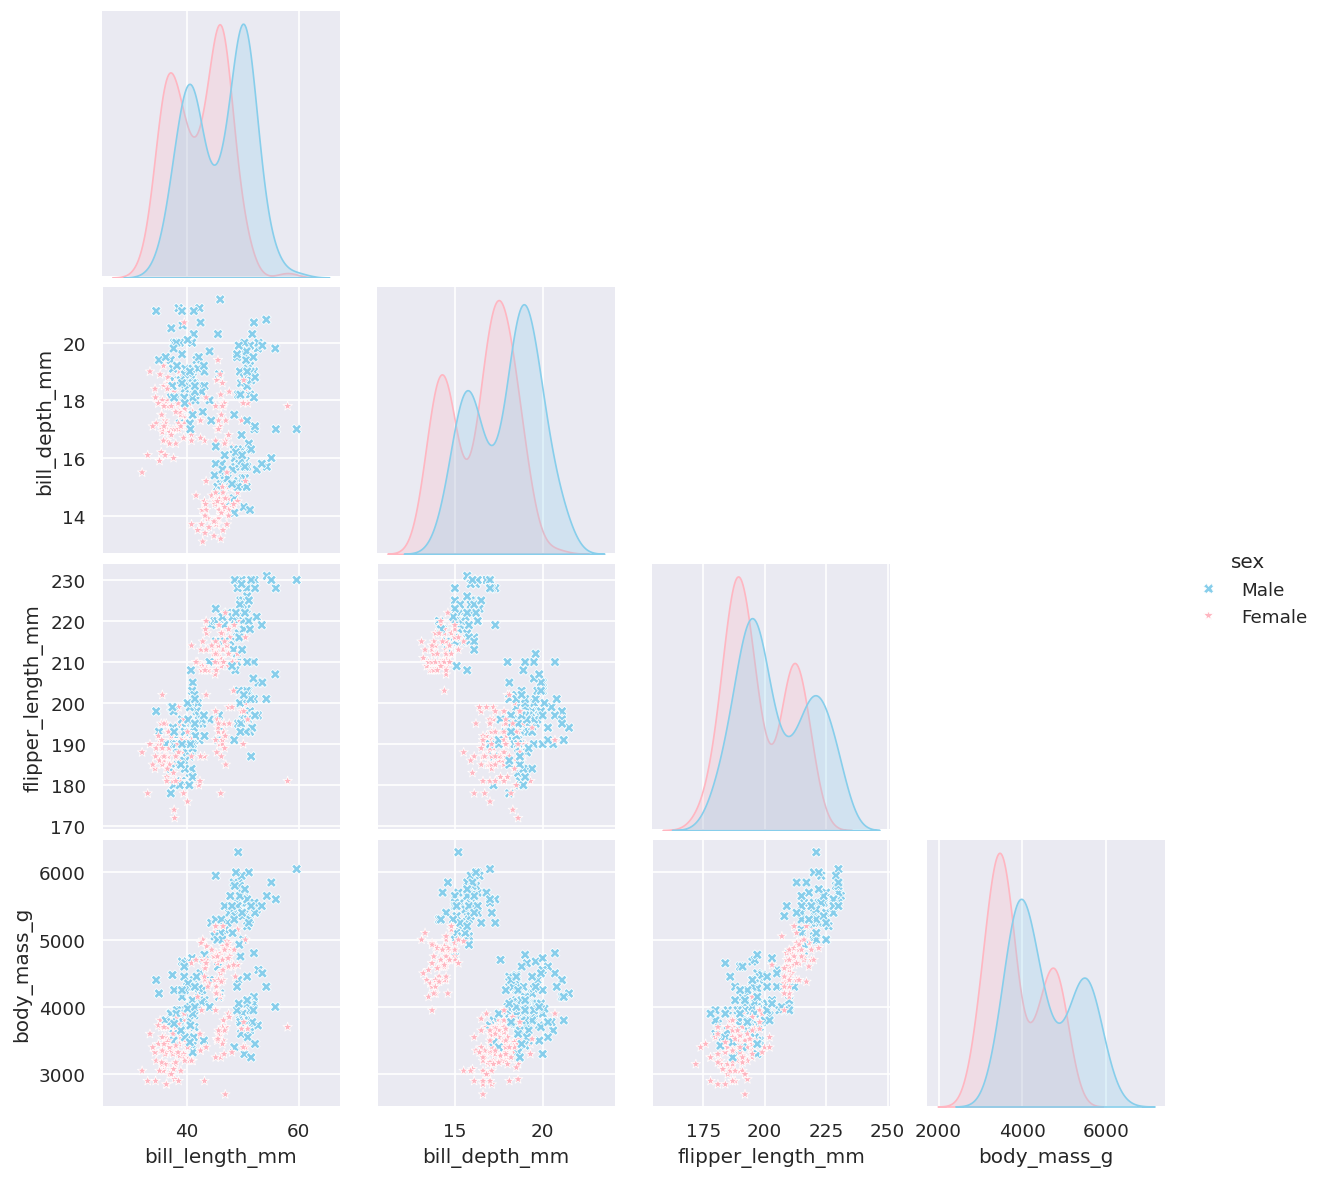

In [25]:
sns.pairplot(penguins, 
             hue='sex', hue_order=['Male', 'Female'],
             markers=['X', '*'], 
             palette=['skyblue', 'lightpink'],
             corner=True);

---

### 3. [**`sns.lmplot()`**](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

`lmplot` используется для визуализации одновременно графика рассеяния (по умолчанию, можно и другой) и линии линейной регрессии

**Синтаксис:**
```python
sns.lmplot(x="x_variable", y="y_variable", data=table_name, ...)
```

**Параметры:**

- **`hue`** - группировка по категориальной переменной. Для каждой категории будет строиться своя линейная регрессия. 
- **`col`** и **`row`**: разбивает график на несколько панелей по оси колонок или строк для категориальных переменных.
- **`markers`** - как и для scatterplot, маркеры для точек на графике. Если задано `hue`, можно передать список маркеров для разных категорий.
- **`ci`** - доверительный интервал. Можно задать значение, которое будет отображать область вокруг линии регрессии
- **`line_kws`** - параметры для настройки линии регрессии. Нужно передавать словарь из необходимых аргументов
- **`scatter_kws`** - параметры для настройки отображения точек (размер или прозрачность). Нужно передавать словарь из необходимых аргументов


Построим такой график для самой скорелированной пары признаков

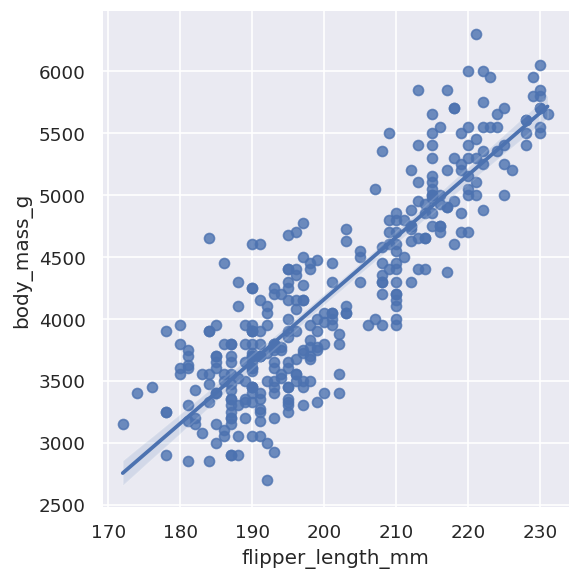

In [26]:
sns.lmplot(x='flipper_length_mm', y='body_mass_g', data=penguins);

Добавляем `hue` по `species` - для каждого вида будет своя линейная регрессия

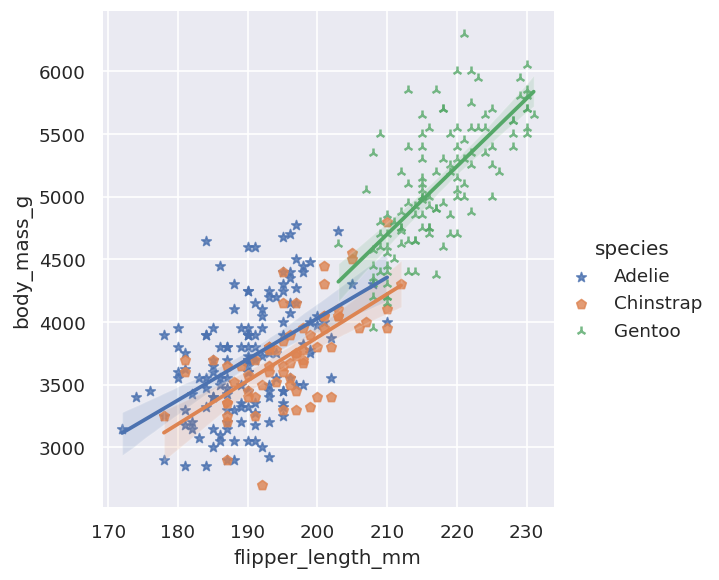

In [27]:
sns.lmplot(x='flipper_length_mm', y='body_mass_g', data=penguins, 
           hue='species', 
           markers=['*', 'p', '2']
           );

---

### 4. [**`sns.jointplot`**](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

`jointplot` используется для визуализации взаимосвязи между двумя переменными с отображением их индивидуальных распределений на осях. То есть он позволяет посмотреть как на **основную зависимость**, так и на отдельных **распределения переменных**. По своей задаче похож на `violinplot`, только здесь два типа графиков более разнесены

**Синтаксис:**
```python
sns.jointplot(x="x_variable", y="y_variable", data=table_name, ...)
```

**Параметры:**

- **`hue`**, **`hue_order`**, **`alpha`**, **`color`**, **`palette`**
- **`kind`** - тип графика для отображения взаимодействия между переменными. Возможные значения:
  - `'scatter'` = график рассеяния (по умолчанию).
  - `'kde'` - график плотности
  - `'hex'` - гексагональная диаграмма (для отображения плотности точек)
  - `'reg'` - к scatterplot добавляет линию регрессии. Не поддерживается с `hue`
- **`marginal_kws`** - словарь с параметрами для настройки графиков на осях (например, для `hist` или `kde`).
- **`joint_kws`** - словарь с параметрами для настройки графика зависимости, например, цвет точек для `scatter`.
- **`markers`** - маркер (или списк маркеров) для точек в графике `scatter`.
- **`size`** -  размер точек на графике (для `scatter` и `hex`).

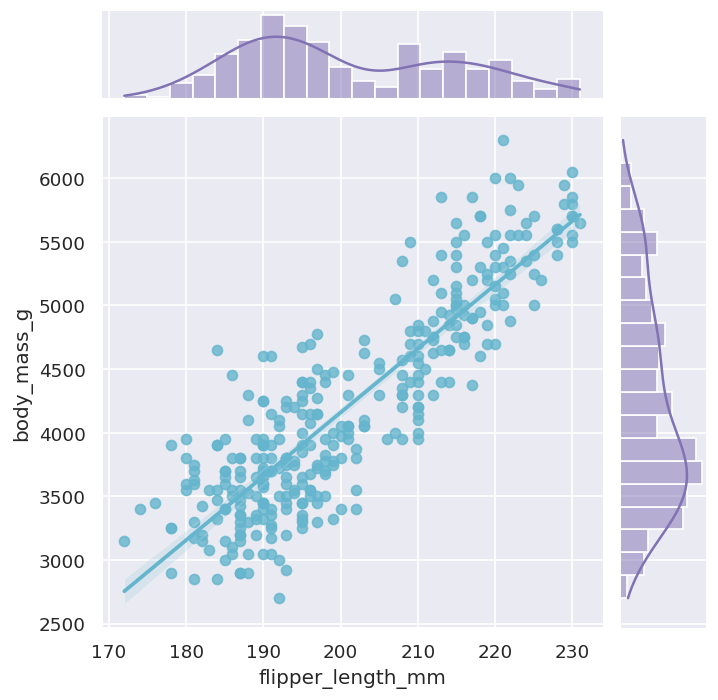

In [28]:
sns.jointplot(x='flipper_length_mm', y='body_mass_g', data=penguins, 
              kind='reg',
              marginal_kws={'bins': 20, 'color': 'm'},
              joint_kws={'color': 'c'},
              );

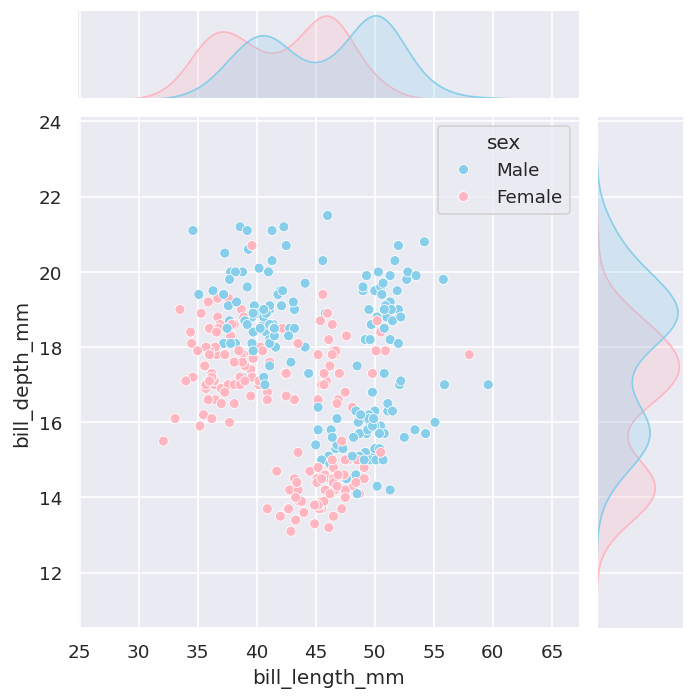

In [29]:
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=penguins, 
              hue='sex', hue_order=['Male', 'Female'],
              palette=['skyblue', 'lightpink'],
              );

---